In [110]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'1.4.0'

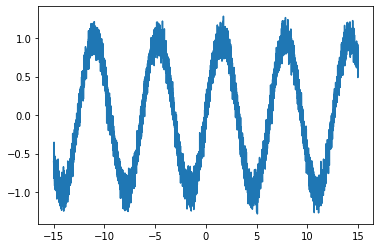

In [111]:
X = np.linspace(-15,15,10000)
y = np.sin(X)
y += np.random.randn(10000)*0.1
plt.plot(X,y)
plt.show()

In [112]:
batch_size = 512
def data_generator(X, y):
    x_b, y_b = [], []
    for i, (x_, y_) in enumerate(zip(X,y)):
        x_b.append(x_)
        y_b.append(y_)
        if i % batch_size == batch_size-1 and i != 0:
            x_b, y_b = np.array(x_b).reshape(batch_size, 1), np.array(y_b).reshape(batch_size, 1)
            x_b = torch.Tensor(x_b).float()
            y_b = torch.Tensor(y_b).float()
            yield x_b, y_b
            x_b, y_b = [], []

In [113]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 10), nn.ReLU(),
            nn.Linear(10, 50), nn.ReLU(),
            nn.Linear(50, 256), nn.ReLU(),
            nn.Linear(256, 50), nn.ReLU(),
            nn.Linear(50, 10), nn.ReLU(),
            nn.Linear(10, 1)
        )
    def forward(self, x):
        return self.net(x)
    

device = "cuda" if torch.cuda.is_available() else "cpu"
model = NN().to(device)

In [114]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [115]:
def train(data_gen, model, loss_fn, optimizer):
    for xx, yy in data_gen:
        xx, yy = xx.to(device), yy.to(device)
        
        pred = model(xx)
        loss = loss_fn(pred, yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [116]:
from tqdm import tqdm

In [117]:
epoch = 2000

for t in tqdm(range(epoch)):
    train(data_generator(X,y), model, loss_fn, optimizer)

100%|██████████| 2000/2000 [01:27<00:00, 22.85it/s]


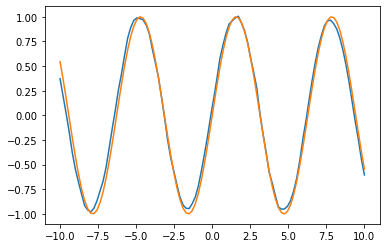

In [118]:
# evaluation
model.eval()
x = np.linspace(-10,10,100).reshape(100,1)
x = torch.tensor(x).to(device).float()

with torch.no_grad():
    res = model(x).cpu().numpy()
    
plt.plot(x.cpu().numpy(), res)
plt.plot(x.cpu().numpy(), np.sin(x.cpu().numpy()))
plt.show()